## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## loading dataset which has daily historical data.

In [3]:
df = pd.read_csv('E:/All strategy prediction.csv')
df

,Date,BTC,2,Indexfund,4,HDFC,6,Gold,8,Mutualfund
0,2/1/2024,4.250781e+06,2/1/2024,22120.46392,2/1/2024,1630.953311,2/1/2024,5455.785286,2/1/2024,959.454481
1,2/2/2024,4.252612e+06,2/2/2024,22035.51310,2/2/2024,1631.376392,2/2/2024,5457.819141,2/2/2024,959.904806
2,2/3/2024,4.255285e+06,2/3/2024,21391.81296,2/3/2024,1707.131623,2/3/2024,5528.830115,2/3/2024,952.998047
3,2/4/2024,4.253110e+06,2/4/2024,21427.06901,2/4/2024,1622.699363,2/4/2024,5578.688063,2/4/2024,953.889546
4,2/5/2024,4.263295e+06,2/5/2024,22105.78492,2/5/2024,1641.865583,2/5/2024,5465.427292,2/5/2024,962.296017
...,...,...,...,...,...,...,...,...,...,...
727,1/28/2026,1.014936e+07,1/28/2026,38013.16963,1/28/2026,1761.465834,1/28/2026,6478.770178,1/28/2026,1673.973047
728,1/29/2026,1.017007e+07,1/29/2026,37942.73991,1/29/2026,1755.532109,1/29/2026,6475.120219,1/29/2026,1668.717862
729,1/30/2026,1.016715e+07,1/30/2026,38014.75796,1/30/2026,1740.077813,1/30/2026,6476.120219,1/30/2026,1673.264600
730,1/31/2026,1.017523e+07,1/31/2026,37390.63896,1/31/2026,1823.945421,1/31/2026,6547.278754,1/31/2026,1665.711131


In [4]:
# just to make sure the Date column is treated as Date datatype
df['Date'] = pd.to_datetime(df['Date'])

## loading dataset which has Yearly historical data.

In [5]:
df1 = pd.read_csv('E:/forecast2.csv',parse_dates=True)
df1

,Date,FD,PPF,EPF
0,1/1/2024,6.976358,6.981409,7.933420
1,1/1/2025,7.065852,7.054817,7.747929
2,1/1/2026,7.023395,7.150421,7.563259
3,1/1/2027,6.920244,7.266313,7.380241
4,1/1/2028,6.789174,7.400345,7.199688
5,1/1/2029,6.645262,7.550175,7.022395
6,1/1/2030,6.495442,7.713297,6.849136


In [6]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [7]:
# as we have common date for all the options , so lets keep one col & delete rest of them
df.drop(['2', '4', '6', '8'], axis=1, inplace=True)

In [8]:
df

,Date,BTC,Indexfund,HDFC,Gold,Mutualfund
0,2024-02-01,4.250781e+06,22120.46392,1630.953311,5455.785286,959.454481
1,2024-02-02,4.252612e+06,22035.51310,1631.376392,5457.819141,959.904806
2,2024-02-03,4.255285e+06,21391.81296,1707.131623,5528.830115,952.998047
3,2024-02-04,4.253110e+06,21427.06901,1622.699363,5578.688063,953.889546
4,2024-02-05,4.263295e+06,22105.78492,1641.865583,5465.427292,962.296017
...,...,...,...,...,...,...
727,2026-01-28,1.014936e+07,38013.16963,1761.465834,6478.770178,1673.973047
728,2026-01-29,1.017007e+07,37942.73991,1755.532109,6475.120219,1668.717862
729,2026-01-30,1.016715e+07,38014.75796,1740.077813,6476.120219,1673.264600
730,2026-01-31,1.017523e+07,37390.63896,1823.945421,6547.278754,1665.711131


In [9]:
# r = pd.date_range(start='2024-02-01',end='2026-02-01', freq='MS')
# r

## plot of investment return (2/24 - 2/26)

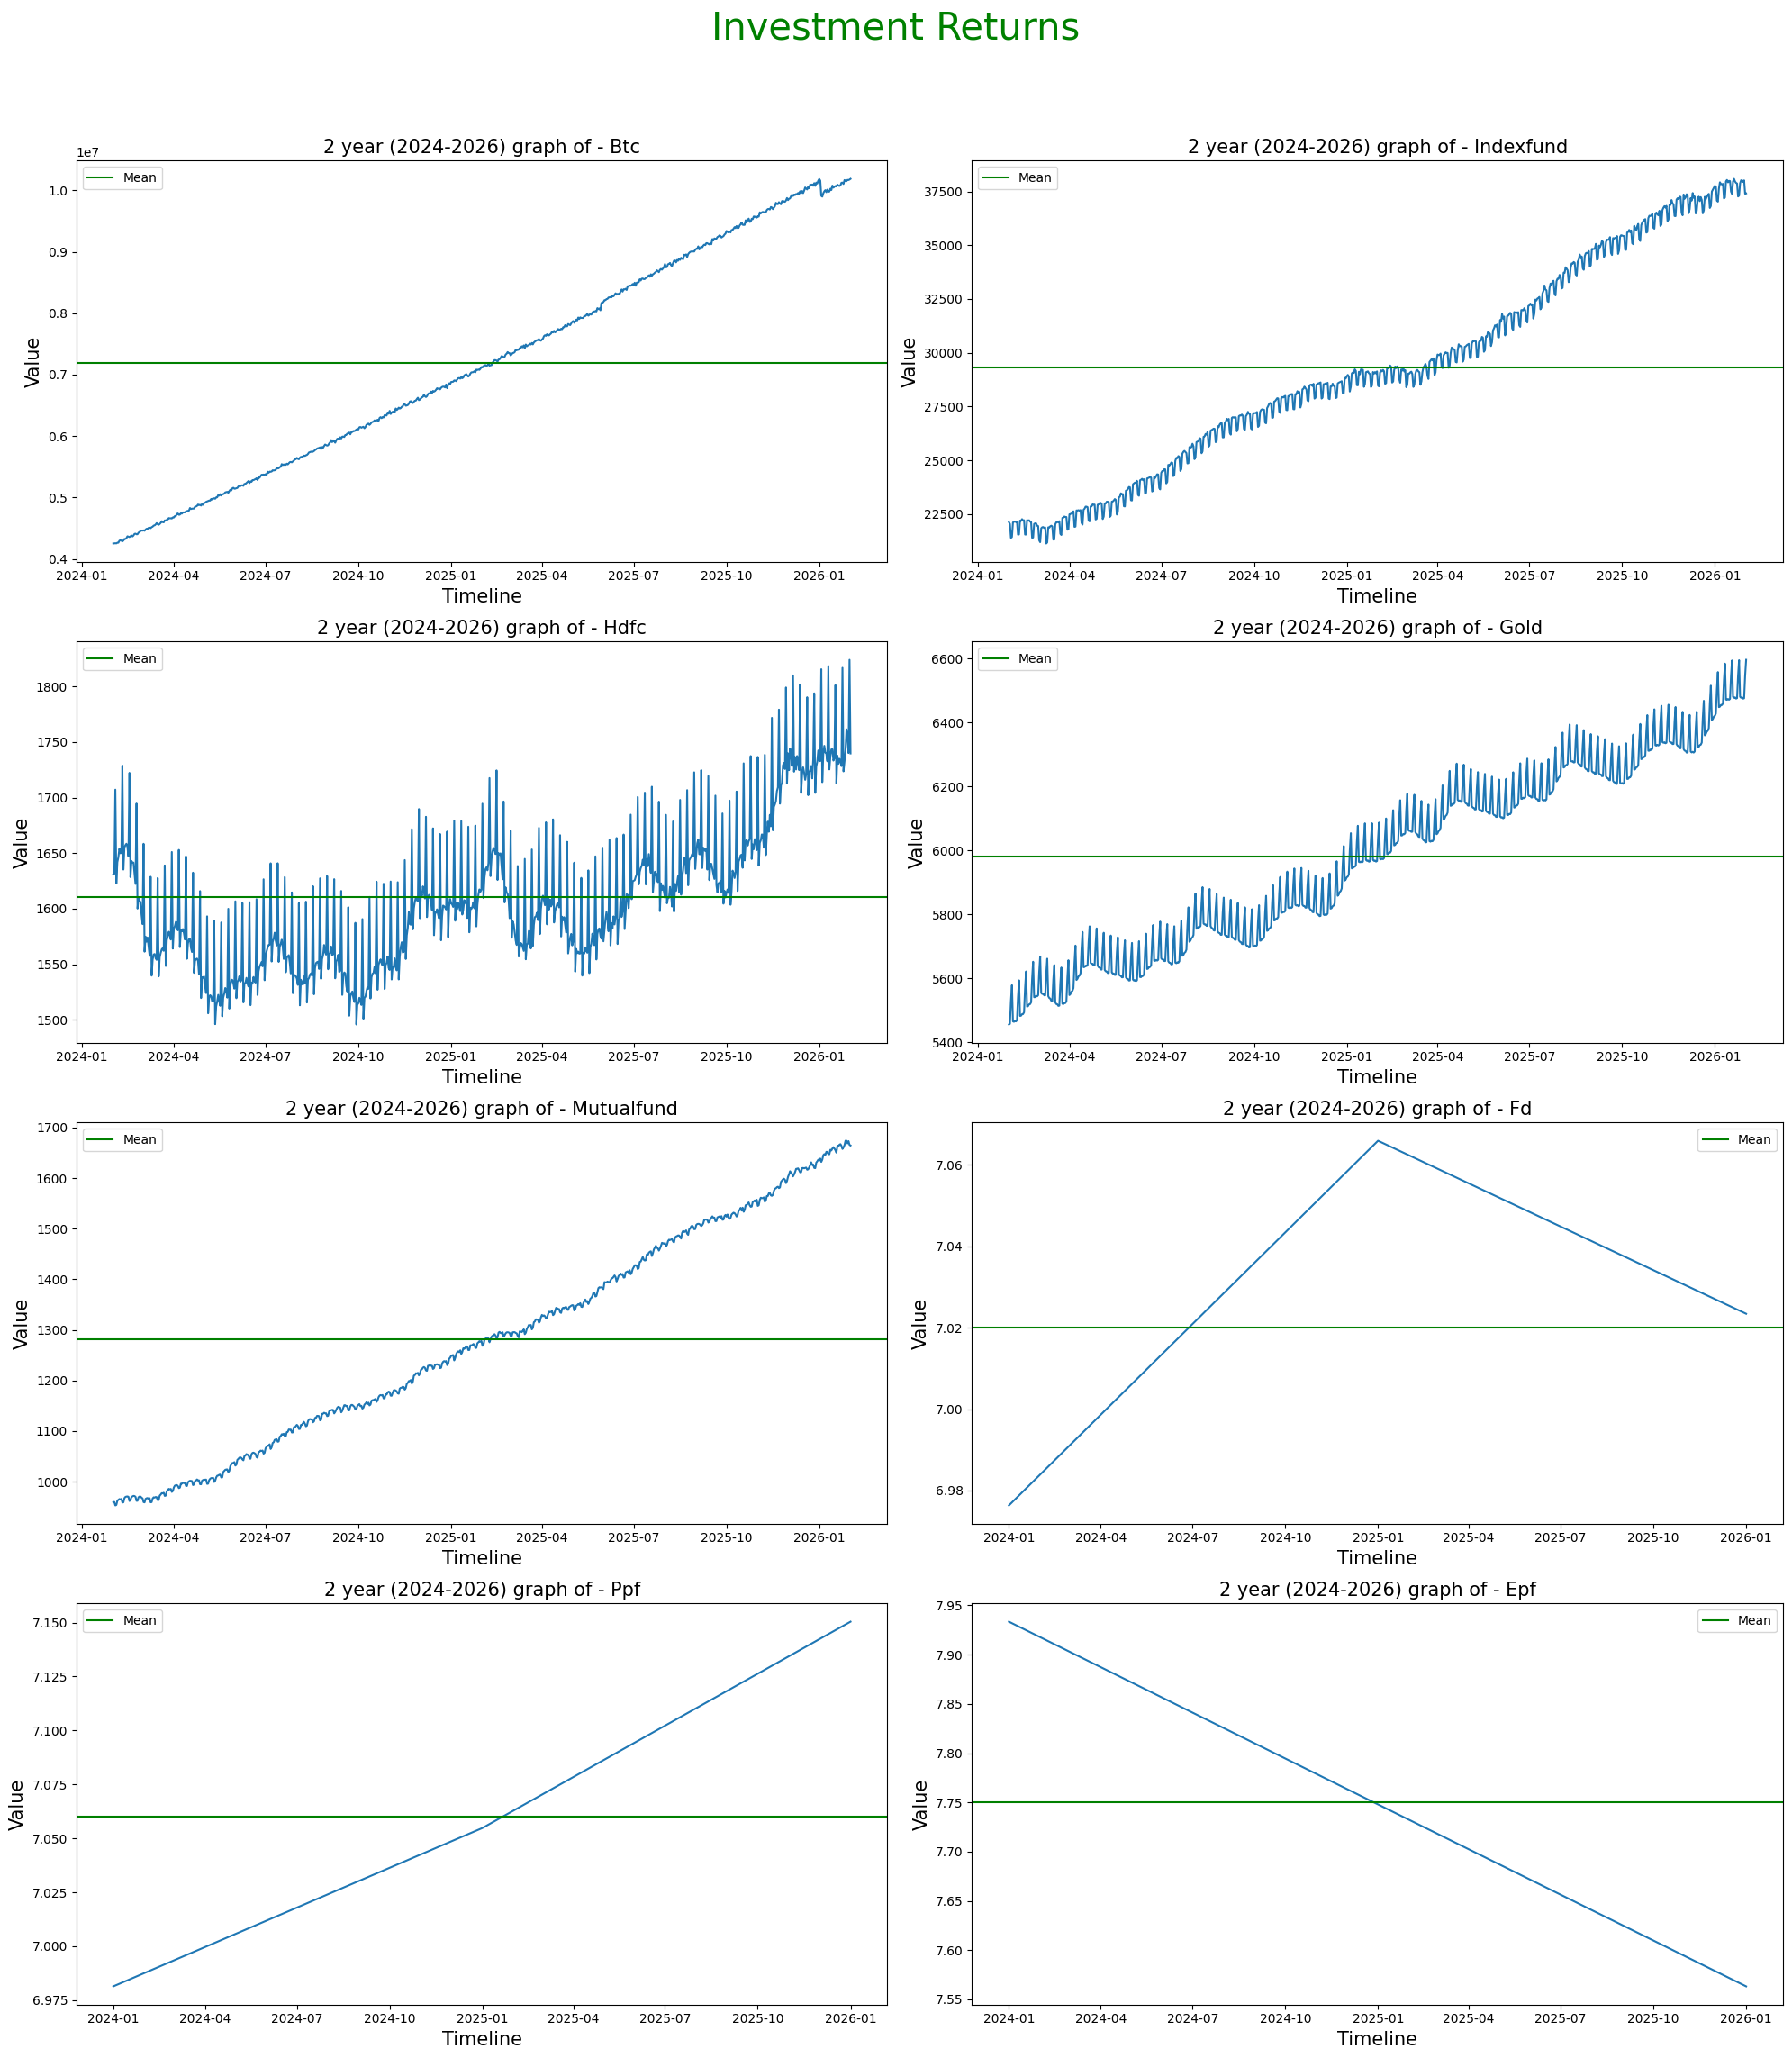

In [10]:
options=df.columns[1:].append(df1.columns[1:])
length=len(options)
num_rows = 4
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6 * num_rows))
axes = axes.flatten()
fig.suptitle("Investment Returns", fontsize=30,color='g')


for i in range(length):

    if(i<5):
        y=df.iloc[:,i+1]
        axes[i].plot(df['Date'],y)
    else:
        # i=5,6,7 6-4
        y=df1.iloc[:3,i-4]
        axes[i].plot(df1['Date'].iloc[:3],y)
        
    meann=round(y.mean(),2)
    axes[i].axhline(meann,color= 'g',label="Mean")
    axes[i].set_xlabel('Timeline',fontsize=15)
    axes[i].set_ylabel('Value',fontsize=15)
    axes[i].set_title(f'2 year (2024-2026) graph of - {options[i].title()}',fontsize=15)
    axes[i].legend()
    # axes[i].set_xticks(r,rotation=90)
    # axes[i].set_xticklabels(years)
        # axes[i].set_yticks(list(y))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig("E:/returns.png" ,dpi=300, bbox_inches= "tight")  # to save figure (change path acc to you)
plt.show()


## Returns of different interval

In [11]:
startdateyear='2024-02-01'

In [12]:
# this function will calculate return of investment by taking start date value and end date value.
def returnCalc(startVal, endVal):
    invstReturnCalc = ( (endVal - startVal) / startVal ) * 100
    return invstReturnCalc

In [13]:
# this function is used to plot the 'return of investment' by taking appropriate parameters

def returncalculate(startdateyear,enddate1year,fd,ppf,epf,timeperiod,endperiod,risk=None):
    global df #to make df available inside the function
    df2 = df[(df['Date'] >= startdateyear) & (df['Date'] <= enddate1year) ]
    invstReturn = {'BTC' : None, 'Indexfund' : None, 'HDFC' : None, 'Gold' : None, 'Mutualfund' : None}
    result = list(invstReturn.keys())
    for i in range(5):
        val = returnCalc(df2.iloc[0, i+1], df2.iloc[-1, i+1])
        invstReturn[result[i]] = round(val, 2)
    startdatefixeddeposit='1/1/2024'
    global df1
    df1 = df1[(df1['Date'] == startdatefixeddeposit)]
    invstReturn['FD'] = fd
    invstReturn['PPF'] = ppf
    invstReturn['EPF'] = epf
    result = list(invstReturn.keys())
    plt.figure(figsize=(18, 7))
    bars=plt.bar(x=result, height=invstReturn.values(),color='g',label='Profit')
    # adding colors to bar's
    flag=False
    for bar in bars:
        height = bar.get_height()
        if height < 0:
            bar.set_color('red')
            bar.set_label('Loss')
        else:
            bar.set_color('green')
            if(flag==False):
                flag=True

    plt.xlabel('Investment Options',fontsize=15)
    plt.ylabel('Return',fontsize=15)
    plt.title(f'{timeperiod} Return ({endperiod})',fontsize=15)
    plt.legend()

    # adding values above the bars
    for i, value in enumerate(invstReturn.values()):
        plt.text(i, value, f'{value:.2f}%', ha='center',style='normal', va='bottom', fontsize=15, color='black')
    
    # to save figure (optional)
    # plt.savefig(f"E:/return{timeperiod}.png" ,dpi=300, bbox_inches= "tight")
        
    # plt.axhline(risk,color= 'g',label="Mean")

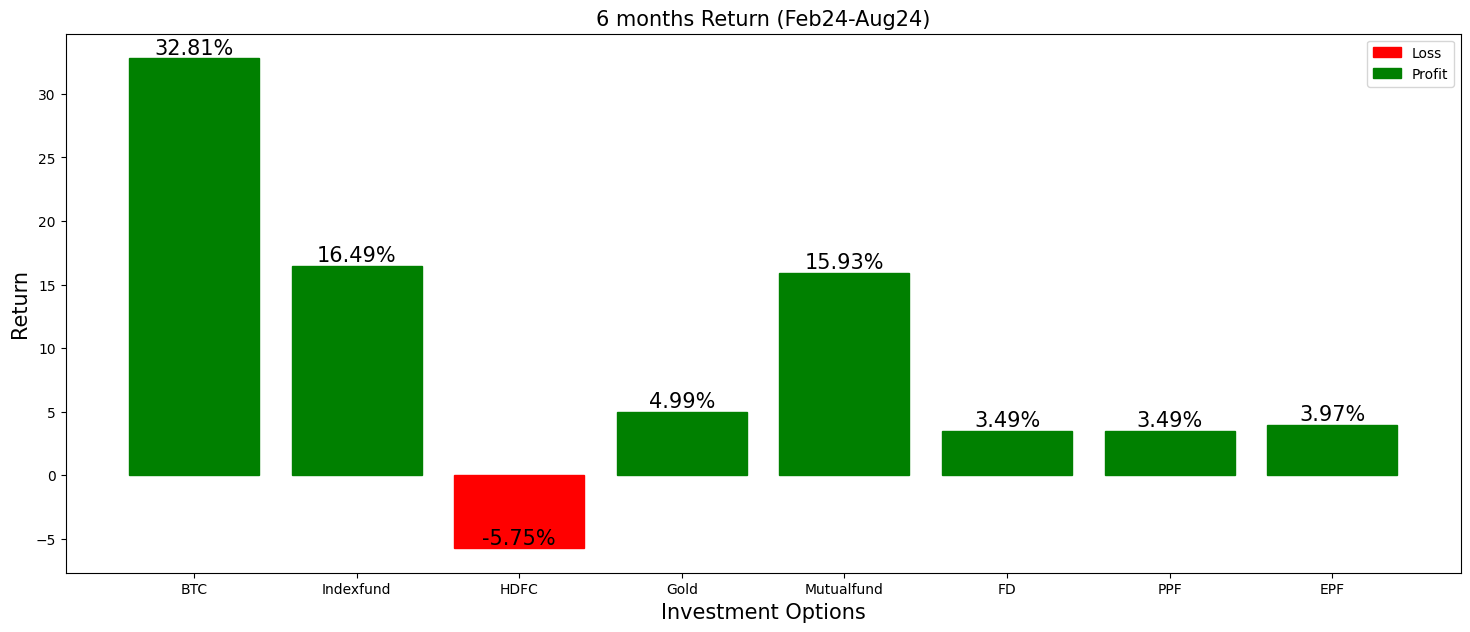

In [14]:
enddateyear='2024-08-01'
returncalculate(startdateyear,enddateyear,6.976358/2,6.981409/2,7.933420/2,'6 months','Feb24-Aug24')

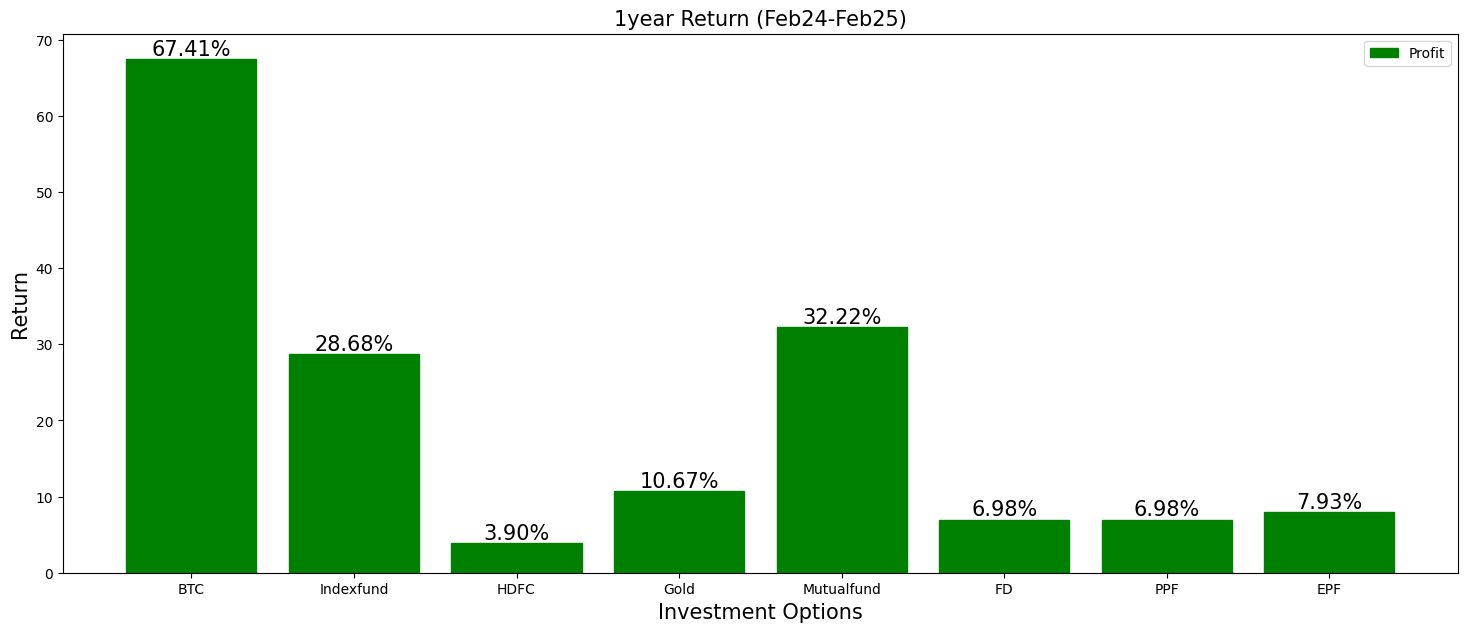

In [15]:
returncalculate(startdateyear,'2025-02-01',6.976358,6.981409,7.933420,'1year','Feb24-Feb25')

In [16]:
# calculating compouding interest of last 3 options
l=[]
for i in range(1,4):
    p=df1.iloc[0,i]
    p=((1+(p/100)) ** 2 - 1) * 100
    p=round(p,4)
    l.append(p)
print(l)

[14.4394, 14.4502, 16.4962]


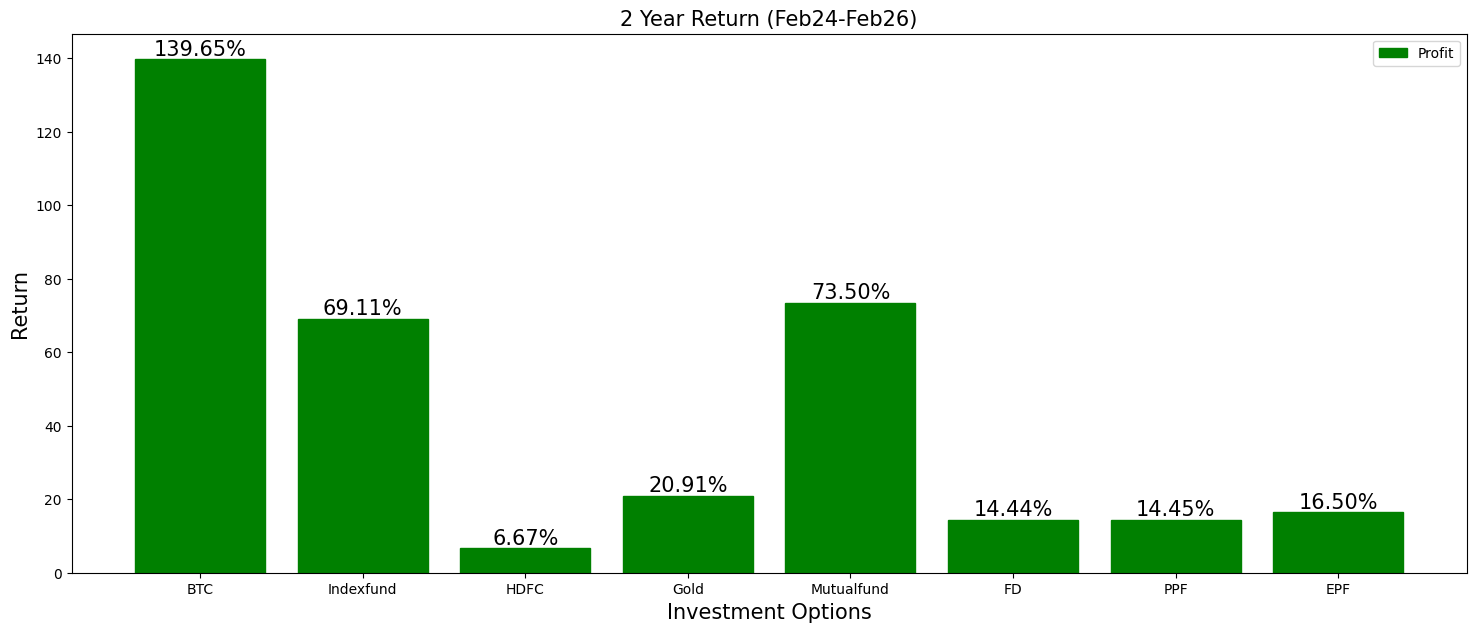

In [17]:
enddateyear='2026-02-01'
returncalculate(startdateyear,enddateyear,l[0],l[1],l[2],'2 Year','Feb24-Feb26')

## Risk

In [29]:
df3 = pd.read_csv('C:/Users/Kaiyu/Downloads/month - Copy.csv') # importing historical data 
df3.tail()

,Date,Bitcoin,NF50,hdfc,gold,mutualfund
23,month std,16.86%,4.25%,5.24%,2.75%,4.23%
24,annualreturn,39.15%,18.25%,14.18%,13.80%,24.76%
25,annual variance,34.12%,2.16%,3.30%,0.91%,2.15%
26,annual std,58.41%,14.71%,18.16%,9.52%,14.66%
27,cov,1.49,0.81,1.28,0.69,0.59


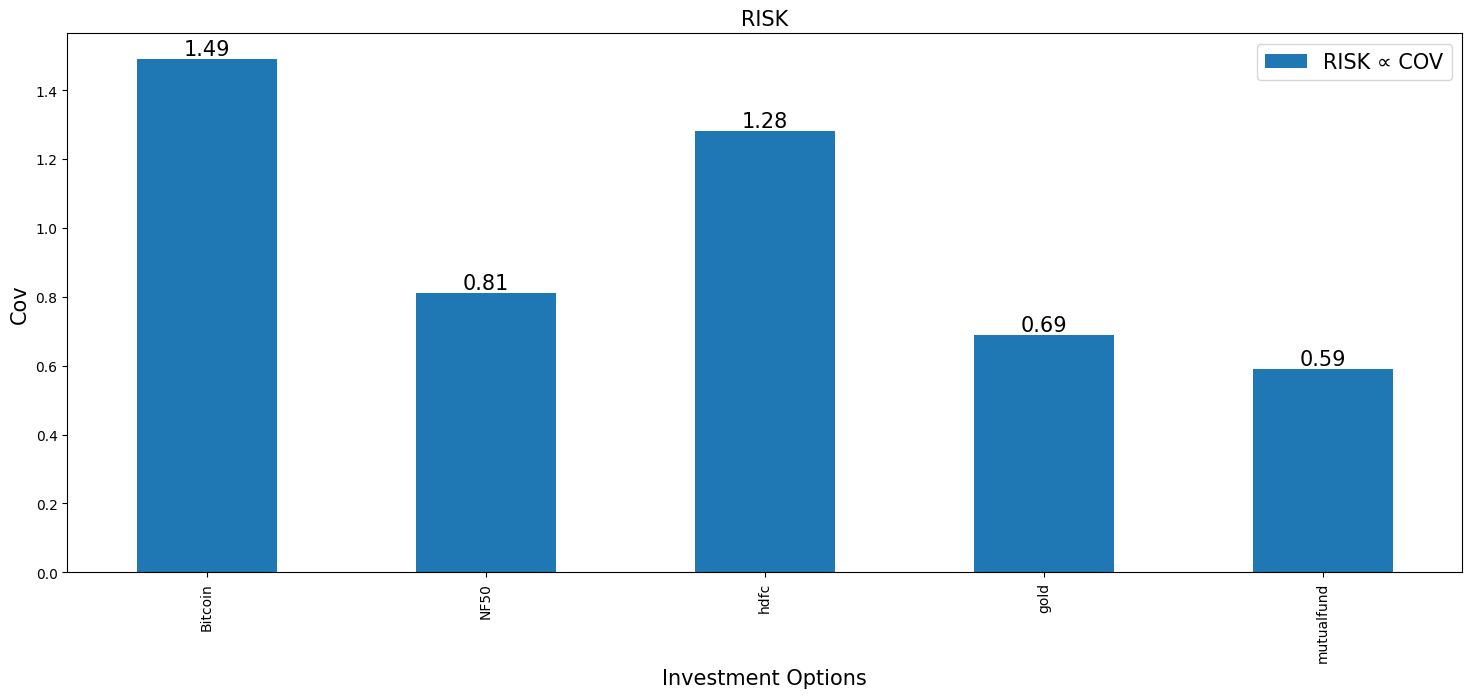

In [144]:
cov_data = df3[df3['Date'] == 'cov']
cov_data = cov_data.drop(columns='Date')
cov_data = cov_data.apply(pd.to_numeric)
cov_data = cov_data.transpose()
cov_data.plot(kind='bar',legend=False,figsize=(18,7))
for i, value in enumerate(cov_data[27]):
    plt.text(i, value, f'{value:.2f}', ha='center',style='normal', va='bottom', fontsize=15, color='black')
plt.title('RISK',fontsize=15)
plt.xlabel('Investment Options',fontsize=15)
plt.ylabel('Cov',fontsize=15)
plt.legend(['RISK ∝ COV'], loc='upper right',fontsize=15)
plt.show()

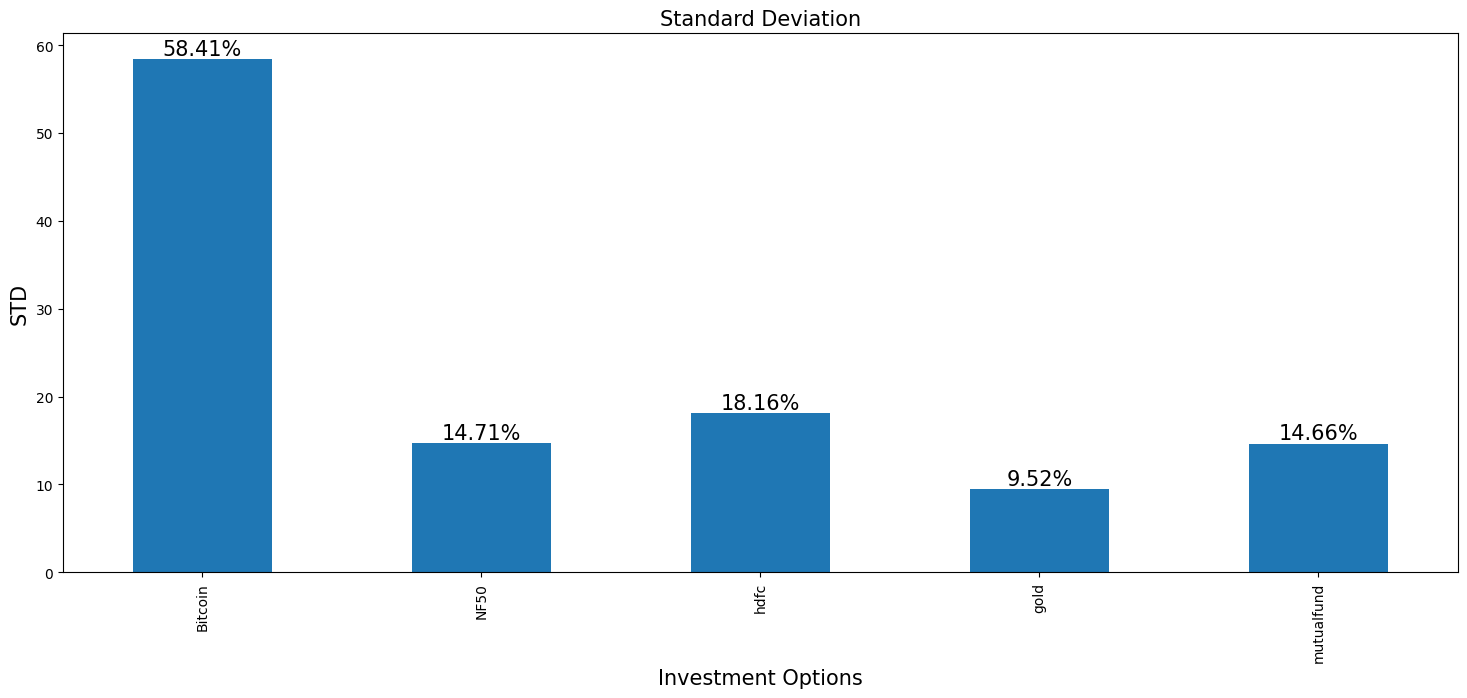

In [157]:
annual_std_data = df3[df3['Date'] == 'annual std']
annual_std_data = annual_std_data.drop(columns='Date')
annual_std_data = annual_std_data.replace('%', '', regex=True)

annual_std_data= annual_std_data.apply(pd.to_numeric)

annual_std_data = annual_std_data.transpose()
annual_std_data.plot(kind='bar',legend=False,figsize=(18,7))
for i, value in enumerate(annual_std_data[26]):
    plt.text(i, value, f'{value:.2f}%', ha='center',style='normal', va='bottom', fontsize=15, color='black')
plt.title('Standard Deviation',fontsize=15)
plt.xlabel('Investment Options',fontsize=15)
plt.ylabel('STD',fontsize=15)
plt.show()

In [17]:
v=df[['BTC', 'Indexfund', 'HDFC', 'Gold', 'Mutualfund']]
risk = v.std()
print(f"Risk of each investment option (Standard Deviation of Returns):\n {round(risk,3)}")
mean_return = v.mean()
print(f"mean of each investment option\n{round(mean_return,3)}")

Risk of each investment option (Standard Deviation of Returns):
 BTC           1783299.123
Indexfund        4881.611
HDFC               64.985
Gold              290.264
Mutualfund        211.560
dtype: float64
mean of each investment option
BTC           7189706.054
Indexfund       29321.544
HDFC             1610.864
Gold             5981.913
Mutualfund       1281.522
dtype: float64


In [25]:
coefficient_of_variation = (risk / mean_return)
print("Risk of each investment option (Coefficient of Variation):\n")
print(coefficient_of_variation)

Risk of each investment option (Coefficient of Variation):

BTC           0.248035
Indexfund     0.166485
HDFC          0.040342
Gold          0.048524
Mutualfund    0.165085
dtype: float64
